## CLASIFICATION METRICS

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Function to visualize the confusion matrix.
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Matriz de Confusión para {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Función para entrenar y evaluar un modelo
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()

    return accuracy, precision, recall, f1, TN, FP, FN, TP

In [3]:
# Load the dataset.
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Displaying the first 10 rows of the dataset.
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [4]:
# Split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


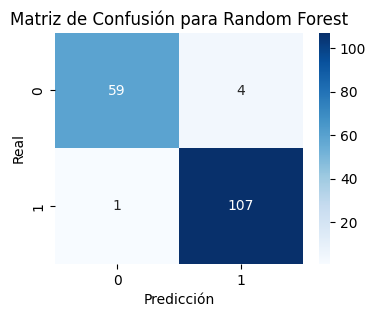

Model: Random Forest
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1-Score: 0.9772

Confusion Matrix:
TP: 107, FP: 4
FN: 1, TN: 59
---------------------------



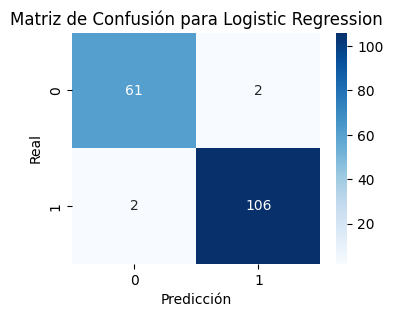

Model: Logistic Regression
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815

Confusion Matrix:
TP: 106, FP: 2
FN: 2, TN: 61
---------------------------



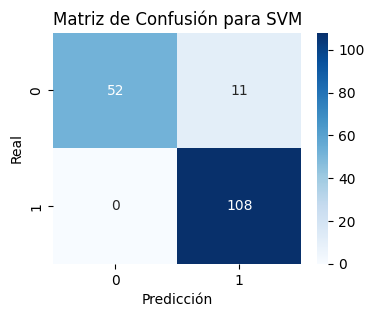

Model: SVM
Accuracy: 0.9357
Precision: 0.9076
Recall: 1.0000
F1-Score: 0.9515

Confusion Matrix:
TP: 108, FP: 11
FN: 0, TN: 52
---------------------------



In [5]:
# Model List
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    accuracy, precision, recall, f1, TN, FP, FN, TP = evaluate_model(model, X_train, y_train, X_test, y_test)
    conf_matrix = np.array([[TN, FP], [FN, TP]])
    plot_confusion_matrix(conf_matrix, name)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(f"TP: {TP}, FP: {FP}")
    print(f"FN: {FN}, TN: {TN}")
    print("---------------------------\n")